<a href="https://colab.research.google.com/github/nm1davi/FIFA22-DataScience/blob/main/FIFA22-Proyecto-DataScience.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Presentacion en Google Slides: https://docs.google.com/presentation/d/1hNnABb4KnDxKbJx61yaygG5-fe9oQgd1bri8rquuW1U/edit?usp=sharing

# Instalación

In [ ]:
!pip install plotly --upgrade
! pip install chart_studio
! pip install bqplot
! pip install pingouin
!pip install mlxtend
! pip install wordcloud
!pip install -U -q PyDrive

In [ ]:
from wordcloud import WordCloud
import pandas                  as pd
from   scipy import stats
import numpy                   as np
import matplotlib.pyplot       as plt
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import seaborn                 as sns
import statsmodels.formula.api as sm
import chart_studio.plotly     as py
import os
from bokeh.resources import INLINE
import bokeh.io
from bokeh import *
import pingouin
import matplotlib.ticker as ticker
bokeh.io.output_notebook(INLINE)
import sys
import joblib
sys.modules['sklearn.externals.joblib'] = joblib
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from  oauth2client.client import  GoogleCredentials

# APÍ Kaggle

In [ ]:
!pip install kaggle


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [ ]:
!cp /content/drive/MyDrive/DataSets/kaggle.json ~/.kaggle/kaggle.json

cp: cannot stat '/content/drive/MyDrive/DataSets/kaggle.json': No such file or directory


In [ ]:
! chmod 600 ~/.kaggle/kaggle.json

chmod: cannot access '/root/.kaggle/kaggle.json': No such file or directory


In [ ]:
! kaggle datasets download stefanoleone992/fifa-22-complete-player-dataset

Traceback (most recent call last):
  File "/usr/local/bin/kaggle", line 5, in <module>
    from kaggle.cli import main
  File "/usr/local/lib/python3.9/dist-packages/kaggle/__init__.py", line 23, in <module>
    api.authenticate()
  File "/usr/local/lib/python3.9/dist-packages/kaggle/api/kaggle_api_extended.py", line 164, in authenticate
    raise IOError('Could not find {}. Make sure it\'s located in'
OSError: Could not find kaggle.json. Make sure it's located in /root/.kaggle. Or use the environment method.


In [ ]:
! unzip fifa-22-complete-player-dataset.zip

unzip:  cannot find or open fifa-22-complete-player-dataset.zip, fifa-22-complete-player-dataset.zip.zip or fifa-22-complete-player-dataset.zip.ZIP.


In [ ]:
df= pd.read_csv("/content/drive/MyDrive/DataScience/players_22.csv")

/usr/local/lib/python3.9/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (25,108) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [ ]:
df.columns.to_list()

In [ ]:
df = df[["short_name", "player_positions", "age", "overall", "potential", "value_eur","wage_eur","nationality_name"]]

# Contexto y Preguntas


**Contexto**

Cuando era pequeño, siempre me gustaba jugar con mi consola videojuegos de fubtol, eran mis preferidos. Fueron pasando los años, fui creciendo y me siguio interesando este estilo de videojuegos. Cada vez investigaba más y buscaba distintas formas de jugar (dentro del videojuego exiten distintas opciones a la hora de jugar, puede ser un usuario vs la maquina, o un usuario vs otro en un partido normal, o podías ser el Director Tecnico de un equipo e ir avanzando y logrando objetivos), a medida que trasncurrian los años FIFA iba sacando nuevos videojuegos, FIFA 19, FIFA 20, FIFA21 y FIFA22, pero el "problema" estaba en que cada vez que te comprabas un nuevo videojuego tenias que armar tu equipo nuenvamente en el formato del juego "SOY DT" entonces tenias que volver a empezar las negociaciones con jugadores, ver que jugadores en ese momento estaban en mejor forma y etc. FIFA apartir del año 2021, te permitia crear una cuenta en la que guardaba tus plantillas de "SOY DT" entonces cuando comprabas el nuevo juego, solamente tenias que cargar tu cuenta y venian todas tus plantillas y configuraciones. Esto mejoro mucho ya que evitaba rehacer tu carrera como DT. Pero tambien fueron agregando cosas nuevas, como manejar sueldos, contratar promesas para mejorar tu plantillla y algunas cosas más que para un jugador nuevo de FIFA sonaba y se veía un poco complicado.

Entonces me gustaria remarcar algunos puntos importantes para que si algun jugador nuevo de FIFA quiere comenzar una "carrera nueva", no le sea tan dificil y confuso a la hora de comezar, por eso vamos a responder algunas preguntas que nos ayudaran a armar un equipo competitivo y salvar algunas dudas.

1. Que jugadores son los mejores en cada posicion para poder comprar, o pedir a prestamo?
2. Que jugadores jovenes van a tener una buena media (overall) en un futuro?
3. La mejor media(overall), que pais la tiene, para armar un equipo con esa química.


**Preguntas Principales**

1. Que jugadores son los mejores en cada posicion para poder comprar, o pedir a prestamo?
2. Que jugadores jovenes van a tener una buena media (overall) en un futuro?
3. La mejor media(overall), que pais la tiene? para armar un equipo con esa química.

**Preguntas Secundarias**
1. De los mejores jugadores en cada posicion, cual es el mas accesible, a la hora de comprarlo?
2. En que es mas conveniente fijarse a la hora de comprar un jugador, su media o su pontecial? (debido a lo que vamos a pagar, vamos a tener que pagar de sueldo, y lo que le queda de carrera)
3. Cual es el promedio de sueldo de los grandes jugadores? y el promedio del valor de los grandes jugadores?
4. A que paises me conviene enviar mis ojeadores? (Los ojeadores son ayudantes que buscan grandes promesas y jugadores)


# ANALISIS EXPLORATORIO

1. De los mejores jugadores en cada posicion, cual es el mas accesible, a la hora de comprarlo?

En los siguientes graficos, vemos los 50 mejores jugadores por posicion, en orden de mas a menos.

A la hora de pagar por algun jugador asi, podemos ver que:

* En arqueros: Neuer, Navas, LLoris y Schmeichel. Cuestan significativamente menos que el resto, pero por ejemplo Neuer es el 3 mejor arquero del juego.

Lo mismo podemos ver en:

* Defensores: Sergio Ramos, Chiellini y Thiago Silva
* Mediocampistas: Modric, Pjanic, Rakitic. En este caso por ejemplo, vemos que Pedri, es bastante mas costoso, eso se debe a que es un jugador joven con un gran Potencial
* Delanteros: Ibrahimovic, Dzeko. Lo mismo que recien, Vinicius en este caso es mucho mas caro que jugadores que tienen mejor media, pero se debe a su pontecial y edad.








In [ ]:

# Seleccionar los 50 mejores arqueros
arqueros = df[df["player_positions"] == "GK"].sort_values("overall", ascending=False).head(50)

# Seleccionar los 50 mejores defensores

defensores = df[df["player_positions"].isin(["CB", "LB", "RB"])].sort_values("overall", ascending=False).head(50)

# # Seleccionar los 50 mejores mediocampistas
mediocampistas = df[df["player_positions"].isin(["CM", "CDM", "CAM", "LM", "RM"])].sort_values("overall", ascending=False).head(50)

# # Seleccionar los 50 mejores delanteros
delanteros = df[df["player_positions"].isin(["ST", "CF", "RW","LW"])].sort_values("overall", ascending=False).head(50)


<ipython-input-28-be9b8bdbb9f1>:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[0, 0].set_xticklabels(arqueros['short_name'], rotation=90)
<ipython-input-28-be9b8bdbb9f1>:14: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[0, 1].set_xticklabels(defensores['short_name'], rotation=90)
<ipython-input-28-be9b8bdbb9f1>:19: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[1, 0].set_xticklabels(mediocampistas['short_name'], rotation=90)
<ipython-input-28-be9b8bdbb9f1>:24: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[1, 1].set_xticklabels(delanteros['short_name'], rotation=90)


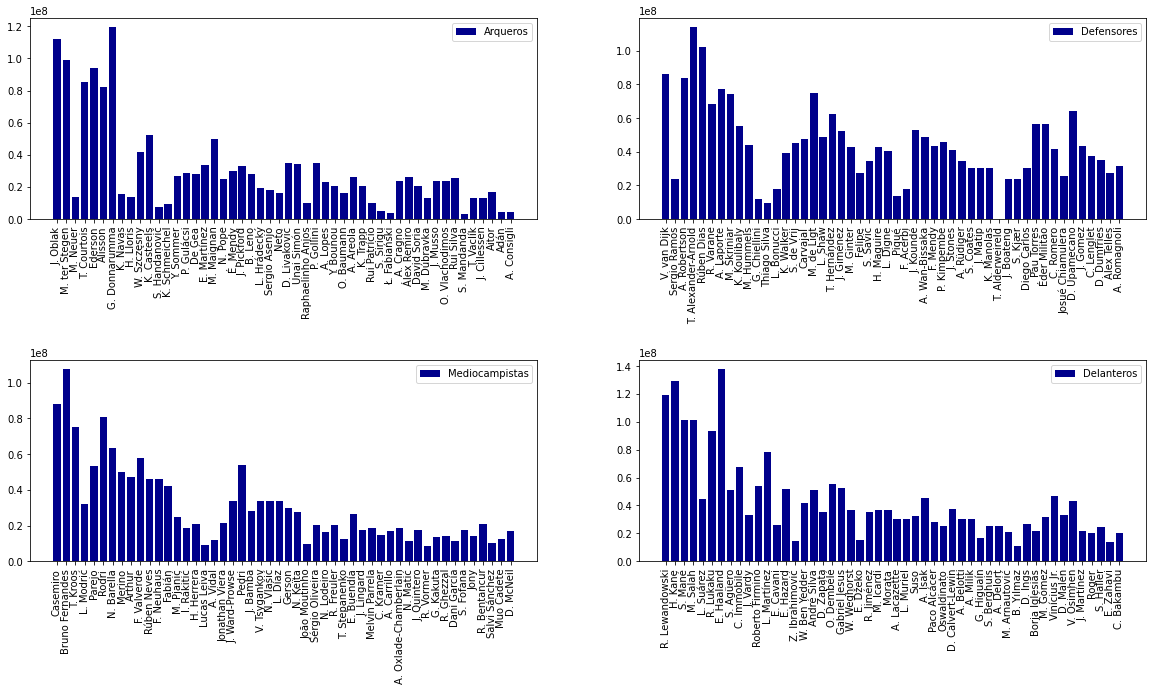

In [ ]:
# Crear la figura y la matriz de gráficos con un tamaño de 10x10 pulgadas
fig, axs = plt.subplots(2, 2, figsize=(20, 10))

fig.subplots_adjust(wspace=0.2, hspace=0.7)


# Graficar el valor overall de los arqueros en el primer gráfico (axs[0, 0])
axs[0, 0].bar(arqueros['short_name'], arqueros['value_eur'], color="darkblue")
axs[0, 0].set_xticklabels(arqueros['short_name'], rotation=90)
axs[0, 0].legend(['Arqueros'])

# Graficar el valor overall de los defensores en el segundo gráfico (axs[0, 1])
axs[0, 1].bar(defensores['short_name'], defensores['value_eur'], color="darkblue")
axs[0, 1].set_xticklabels(defensores['short_name'], rotation=90)
axs[0, 1].legend(['Defensores'])

# Graficar el valor overall de los mediocampistas en el tercer gráfico (axs[1, 0])
axs[1, 0].bar(mediocampistas['short_name'], mediocampistas['value_eur'],color="darkblue")
axs[1, 0].set_xticklabels(mediocampistas['short_name'], rotation=90)
axs[1, 0].legend(['Mediocampistas'])

# Graficar el valor overall de los delanteros en el cuarto gráfico (axs[1, 1])
axs[1, 1].bar(delanteros['short_name'], delanteros['value_eur'],color="darkblue")
axs[1, 1].set_xticklabels(delanteros['short_name'], rotation=90)
axs[1, 1].legend(['Delanteros'])

# Mostrar el gráfico
plt.show()



2. En que es mas conveniente fijarse a la hora de comprar un jugador, su media o su pontecial? (debido a lo que vamos a pagar, vamos a tener que pagar de sueldo, y lo que le queda de carrera)

En este punto tomaremos como ejemplo los 50 mejores jugadores y podemos ver que hay mas cantidad de jugadores con potencial alto, que con media actual alta. Ademas el promedio de potencial, es mayor al promedio de la media actual.

In [ ]:
top_50_overall = df.nlargest(50, "overall").sort_values('overall',ascending=False)
df_menores_25 = df[df["age"] < 26]
top_50_potential = df_menores_25.sort_values(by="potential", ascending=False).head(50)


In [ ]:
import plotly.graph_objs as go
import plotly.subplots as sp

fig = sp.make_subplots(rows=1, cols=2)

fig.add_trace(go.Histogram(x=top_50_overall['overall'], name='overall',
                         marker=dict(color='#EB89B5',line=dict(color='black', width=2))), row=1, col=1)

fig.add_trace(go.Histogram(x=top_50_potential['potential'], name='potential',
                         marker=dict(color='#6D4C41',line=dict(color='black', width=2))), row=1, col=2)

fig.update_layout(title={
        'text': "Media Vs Potencial",
        'y':0.9,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'}, xaxis_title='Valor', yaxis_title='Frecuencia')

fig.show()


In [ ]:
#Calculamos el promedio de la media y del potencial de los jugadores
media_overall= top_50_overall["overall"].mean()
media_potential = top_50_potential["potential"].mean()
print(media_overall)
print(media_potential)

88.4
89.6


In [ ]:
#Promedio Media vs Potencial

fig = make_subplots(rows=1, cols=2)


fig.add_trace(go.Bar(x=['Promedio'], y=[top_50_overall['overall'].mean()],width=[0.2], name='Overall'))


fig.add_trace(go.Bar(x=['Promedio'], y=[top_50_potential['potential'].mean()],width=[0.2], name='Potencial'))


fig.update_layout(yaxis_title='Valoracion')

fig.show()


Aqui vemos que el grafico del lado derecho(media vs edad) los valores mas altos se encuentran mas a la derecha, esto quiere decir que de los 50 mejores jugadores los mejores superan los 28 años. Y el grafico de la izquierda(potencial vs edad) es alreves los puntos mas altos estan del lado izquierdo, esto quiere decir que de los 50 mejores jugadores, los que tienen mas potencial a desarrollar son menores a 25 años.

In [ ]:
fig = make_subplots(rows=1, cols=2, subplot_titles=('Media vs Edad', 'Potencial vs Edad'))

fig.add_trace(
    go.Scatter(x=top_50_overall['age'],  y=top_50_overall['overall'],name="Media",  mode="markers", text=top_50_overall["short_name"]),
    row=1, col=1
)

fig.add_trace(
    go.Scatter(x=top_50_potential['age'],  y=top_50_potential['potential'],name="Potencial",  mode="markers", text=top_50_potential["short_name"]),
    row=1, col=2
)

fig.update_layout(title={
        'text': "50 mejores jugadores por Media y Potencial vs Edad",
        'y':0.9,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'}, xaxis_title='Edad', yaxis_title='Media/Potencial')

fig.show()

A continuacion podemos observar que:

Hay jugadores que tienen un gran potencial y cuestan significativamente menos que jugadores con media actual mas alta. Por ejemplo: Vinicius Jr, cuesta 46.5 M, con un potencial a desarrollar a 90, 20 años y Toni Kross con 31 años (es decir con 3 o 4 años mas por jugar) cuesta 75.6 M.

Y asi podemos ver algunos otros ejemplos.

In [ ]:
top_50_overall_valor = top_50_overall.sort_values('value_eur',ascending=True)
top_50_potential_valor= top_50_potential.sort_values('value_eur',ascending=True)


fig = make_subplots(rows=1, cols=2)

fig.add_trace(go.Bar(x=top_50_overall_valor["short_name"], y=top_50_overall_valor["value_eur"],
                    name='Media', marker=dict(color='blue')), row=1, col=1)

fig.add_trace(go.Bar(x=top_50_potential_valor["short_name"], y=top_50_potential_valor["value_eur"],
                    name='Potencial', marker=dict(color='orange')), row=1, col=2)

fig.update_layout(title={
        'text': "Valor del Jugador vs Media y Potencial",
        'y':0.9,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'}, xaxis_title='Nombre', yaxis_title='Valor en Euros')


fig.show()


En el siguiente grafico podemos ver algo parecido al anterior:

Por ejemplo: En este caso Ansu Fati con 20 años, un potencial de 90, cobra 44 K por temporada. Mientras que Benzema, con 33 años, media de 89 cobra 310 K por temporada.

In [ ]:
top_50_overall_sueldos = top_50_overall.sort_values('wage_eur',ascending=True)
top_50_potential_sueldos= top_50_potential.sort_values('wage_eur',ascending=True)

fig = make_subplots(rows=1, cols=2)


fig.add_trace(go.Bar(x=top_50_overall_sueldos["short_name"], y=top_50_overall_sueldos["wage_eur"],
                    name='Media', marker=dict(color='blue')), row=1, col=1)


fig.add_trace(go.Bar(x=top_50_potential_sueldos["short_name"], y=top_50_potential_sueldos["wage_eur"],
                    name='Potencial', marker=dict(color='orange')), row=1, col=2)

fig.update_layout(title={
        'text': "Sueldo del Jugador VS Media y Potencial",
        'y':0.9,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'}, xaxis_title='Nombre', yaxis_title='Sueldo en Euros')

fig.show()


3. Cual es el promedio de sueldo de los grandes jugadores? y el promedio del valor de los grandes jugadores?

En este punto, lo que vamos a analizar es:

El promedio de sueldo del TOP 50, esto nos da referencia que los valores que estan por encima de ese promedio, es que ganan mas que lo normal, y los que ganan menos, lo contrario. Con esta pregunta tambien podemos ayudarnos a la hora de negociar, saber cual es el promedio de los jugadores estrellas y establecer un sueldo menor para comenzar a negociar, hasta llegar al promedio.

Podemos observar que el TOP 50 potencial, hay una mayor varianza respectoa a la media, los datos estan mas distribuidos, por lo que tendremos mas posibilades de negociar entre uno y otro jugador. Pero podemos ver tambien que la media del TOP 50 Potencial, es menor al otro, entonces va a ser mas accesible, negociar con estos jugadores porque tendremos que comenzar desde mas abajo a ofrece sueldos.

In [ ]:
fig = go.Figure()
fig.add_trace(go.Box(x=top_50_overall["wage_eur"], name="Sueldo TOP 50 Media",text=top_50_overall["short_name"]))
fig.add_trace(go.Box(x=top_50_potential["wage_eur"],name="Sueldo TOP 50 Potencial",text=top_50_potential["short_name"]))

fig.update_traces(boxpoints='all', jitter=0)
fig.show()


En este grafico vemos, que existen datos anomalos, lo que signifca que estan por fuera de la REF4, en este caso es Mbappe, ese jugador sera muy dificil de comprar.

In [ ]:
fig = go.Figure()
fig.add_trace(go.Box(x=top_50_overall["value_eur"], name="Valor TOP 50 Media",text=top_50_overall["short_name"]))
fig.add_trace(go.Box(x=top_50_potential["value_eur"],name="Valor TOP 50 Potencial",text=top_50_potential["short_name"]))

fig.update_traces(boxpoints='all', jitter=0)
fig.show()


4. A que paises me conviene enviar mis ojeadores o por que país comienzo? (Los ojeadores son ayudantes que buscan grandes promesas y jugadores)


Podriamos enviar a nuestros ojeadores o ayudantes a:

Francia

Brasil

Belgica

Portugal

Para empezar a buscar jugadores, ya que tiene un promedio elevado en la media actual y tambien jugadores con un buen potencial, entonces podriamos optar por las dos opciones.

Una vez que conseguimos lo que buscamos, podriamos ir a otro paises como por ejemplo:

Alemania

Argentina

Holanda

Ya que son paises que tienen varios de las futuras promesas y como vimos anteriormente, nos convienen jugadores jovenes con gran Potencial

In [ ]:
top_50_potential_mean = top_50_potential.groupby('nationality_name')['potential'].sum().reset_index()
top_50_overall_mean = top_50_overall.groupby('nationality_name')['overall'].sum().reset_index()


fig = make_subplots(rows=1, cols=2, specs=[[{'type': 'domain'}, {'type': 'domain'}]])


fig.add_trace(go.Pie(values=top_50_overall_mean['overall'], labels=top_50_overall_mean['nationality_name']), 1, 1)

fig.add_trace(go.Pie(values=top_50_potential_mean['potential'], labels=top_50_potential_mean['nationality_name']), 1, 2)


fig.update_layout(title='Nacionalidad de los 50 Jugadores Vs Potencial y Media',
                  showlegend=False,
                  annotations=[dict(text='Overall', x=0.18, y=0.5, font_size=20, showarrow=False),
                               dict(text='Potential', x=0.82, y=0.5, font_size=20, showarrow=False)])

fig.show()


Para terminar, armaremos un 11 ideal, el cual se ve bastante competitivo

In [ ]:
df_11_ideales = pd.DataFrame({'pos': ['GK', 'LB', 'RB', 'CB', 'CB', 'CDM', 'CM', 'CM', 'RW', 'LW', 'CF'],
                   'name': ['H. Lloris', 'F. Mendy', 'K. Walker', 'V. Van Dijk', 'M. De Light', 'C. Soler', 'Pedri', 'Pau Torres', 'Vinicius.Jr', 'Ansu Fati', 'E. Haland'],
                   'x': [0, -1, 1, -0.5, 0.5, -0.5, 0, 0.5, 1, -1, 0],
                   'y': [0, 1, 1, 1, 1, 2, 2.5, 2, 3, 3, 3.5]})


fig = px.scatter(df_11_ideales, x='x', y='y', text='name', hover_name='name', color="y",
                 labels={'x':'Posición en x', 'y':'Posición en la cancha', 'text':'Nombre del jugador'})

fig.update_layout(title={
        'text': "Mi 11 Ideal",
        'y':1,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'}, xaxis_title=" " , yaxis_title=" " , plot_bgcolor='lightgreen', xaxis_showgrid=False, yaxis_showgrid=False, xaxis=dict(showticklabels=False), yaxis=dict(showticklabels=False))


fig.show()


#Posicion en la Cancha
# 0=Arqueros
# 1= defensores
# 2-2,5= mediocampistas
# 3-3,5 = Delanteros

# Adjunto URL de presentacion:

URL: https://docs.google.com/presentation/d/12Gha_azEFGT52kyj1a2xQXYHW4vcaA3YKhK4abQti6A/edit?usp=sharing

# Machine Learning



Ahora que ya pase por la parte de Analisis Exploratorio, quiero saber si el club estara pagando bien el valor de los jugadores. En el juego existen jugadores que se llaman "Jugadores Base" o "Jugador de la cantera". Estos son jugadores que tienen enorme potencial pero que al comenzar el juego tienen una media muy baja, entonces vamos a predecir que valor van a tener esos jugadores el dia que lleguen a su potencial. Para ver si nos conviene dejarnos esos jugadores y luego venderlos. O tambien si nos conviene salir a buscar este estilo de jugadores por el valor a futuro vs el valor del comienzo (vale aclarar que el valor del comienzo es casi nulo en relacion a los valores que he estado manenajdo en este proyecto).

Selecciono estas columnas para comenzar mi Machine Learning.

* player_positions
* age
* height_cm
* weight_kg
* weak_foot (pie debil)
* skill_moves
* value_eur
* wage_eur


In [ ]:
#Importo datos, y selecciono columnas que necesito

df= pd.read_csv("/content/drive/MyDrive/DataScience/players_22.csv", usecols= ['age','player_positions','value_eur','height_cm','weight_kg','weak_foot','skill_moves',])
df

,player_positions,value_eur,age,height_cm,weight_kg,weak_foot,skill_moves
0,"RW, ST, CF",78000000.0,34,170,72,4,4
1,ST,119500000.0,32,185,81,4,4
2,"ST, LW",45000000.0,36,187,83,4,5
3,"LW, CAM",129000000.0,29,175,68,5,5
4,"CM, CAM",125500000.0,30,181,70,5,4
...,...,...,...,...,...,...,...
19234,CDM,70000.0,22,180,64,3,2
19235,CM,110000.0,19,175,70,3,2
19236,CM,100000.0,21,178,72,3,2
19237,ST,110000.0,19,173,66,3,2


#DataCleaning

In [ ]:
#Hacemos un analisis resumido de los datos
df.describe()

,age,overall,potential,value_eur,wage_eur
count,19239.000000,19239.000000,19239.000000,1.916500e+04,19178.000000
mean,25.210822,65.772182,71.079370,2.850452e+06,9017.989363
std,4.748235,6.880232,6.086213,7.613700e+06,19470.176724
min,16.000000,47.000000,49.000000,9.000000e+03,500.000000
25%,21.000000,61.000000,67.000000,4.750000e+05,1000.000000
50%,25.000000,66.000000,71.000000,9.750000e+05,3000.000000
75%,29.000000,70.000000,75.000000,2.000000e+06,8000.000000
max,54.000000,93.000000,95.000000,1.940000e+08,350000.000000


In [ ]:
#Vemos cantidad de nulos
df.isna().sum()

player_positions     0
value_eur           74
age                  0
height_cm            0
weight_kg            0
weak_foot            0
skill_moves          0
dtype: int64

In [ ]:
#La cantidad de datos nulos en value_eur son muy pocos en relacion a los que tenemos, entonces los eliminamos.
df= df.dropna().reset_index(drop=True)
df.isna().sum()

player_positions    0
value_eur           0
age                 0
height_cm           0
weight_kg           0
weak_foot           0
skill_moves         0
dtype: int64

In [ ]:
#Corregimos los datos, los transformamos en int
df["value_eur"] = df["value_eur"].astype(int)
df.head()

,player_positions,value_eur,age,height_cm,weight_kg,weak_foot,skill_moves
0,"RW, ST, CF",78000000,34,170,72,4,4
1,ST,119500000,32,185,81,4,4
2,"ST, LW",45000000,36,187,83,4,5
3,"LW, CAM",129000000,29,175,68,5,5
4,"CM, CAM",125500000,30,181,70,5,4


In [ ]:
# Vemos que tipo de datos tenemos, (vemos que hay object, necesitamos que todos sean int64)
df.dtypes

player_positions    object
value_eur            int64
age                  int64
height_cm            int64
weight_kg            int64
weak_foot            int64
skill_moves          int64
dtype: object

In [ ]:
#Hacemos One-Hot-Enconding sobre player_positions
df_one_hot = pd.get_dummies(df['player_positions'].str.get_dummies(', '))
df = pd.concat([df, df_one_hot], axis=1)
df.drop(columns='player_positions', inplace=True)
df.head()

,value_eur,age,height_cm,weight_kg,weak_foot,skill_moves,CAM,CB,CDM,CF,...,GK,LB,LM,LW,LWB,RB,RM,RW,RWB,ST
0,78000000,34,170,72,4,4,0,0,0,1,...,0,0,0,0,0,0,0,1,0,1
1,119500000,32,185,81,4,4,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,45000000,36,187,83,4,5,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
3,129000000,29,175,68,5,5,1,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4,125500000,30,181,70,5,4,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
#Verificamos tipos de datos (Son todos int64)
df.dtypes

value_eur      int64
age            int64
height_cm      int64
weight_kg      int64
weak_foot      int64
skill_moves    int64
CAM            int64
CB             int64
CDM            int64
CF             int64
CM             int64
GK             int64
LB             int64
LM             int64
LW             int64
LWB            int64
RB             int64
RM             int64
RW             int64
RWB            int64
ST             int64
dtype: object

# Entrenamos un modelo para testear performance (este va a andar mal)

---



In [ ]:
#Separamos el dataset en train y test

from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

#Separamos la data en features y target
features = df.drop('value_eur', axis=1)
target = df['value_eur']

# Separamos la data en taining y testing
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=0)

# Entrenamos The Random Forest Regressor
model = RandomForestRegressor(n_estimators=100, random_state=0)
model.fit(X_train, y_train)


# Evaluamos el modelo
score = model.score(X_test, y_test)
print("Test Score: ", score)

Test Score:  0.06528595271603055


Vemos que la performance de este entrenamiento es muy baja, tiene un Score de 0.06, es bajisimo

Decido entrenar mi modelo con las columnas de Overall y Potential ademas de las que estan. Hacemos el data cleaning que hicimos, volvemos a probar el random forest y vemos que le va bien. Para entender que sucede, hacemos la correlacion y vemos que esas 2 variables son las importantes. Decidimos descartar las demas. Ahora volvemos a entrernar el modelo SOLO con esas 2 variables, vemos que la performance es alta y decidimos dejar el modelo asi. Ahora probamos varios modelos, y despues sobre el que elegimos, agregamos hiperparametros

In [ ]:
# Agregamos columnas de "overall" y "potential" para testear

df= pd.read_csv("/content/drive/MyDrive/DataScience/players_22.csv", usecols= ['age', 'overall', 'potential', 'player_positions','value_eur','height_cm','weight_kg','weak_foot','skill_moves',])
df

,player_positions,overall,potential,value_eur,age,height_cm,weight_kg,weak_foot,skill_moves
0,"RW, ST, CF",93,93,78000000.0,34,170,72,4,4
1,ST,92,92,119500000.0,32,185,81,4,4
2,"ST, LW",91,91,45000000.0,36,187,83,4,5
3,"LW, CAM",91,91,129000000.0,29,175,68,5,5
4,"CM, CAM",91,91,125500000.0,30,181,70,5,4
...,...,...,...,...,...,...,...,...,...
19234,CDM,47,52,70000.0,22,180,64,3,2
19235,CM,47,59,110000.0,19,175,70,3,2
19236,CM,47,55,100000.0,21,178,72,3,2
19237,ST,47,60,110000.0,19,173,66,3,2


In [ ]:
#Data Cleaning

#Hacemos un analisis resumido de los datos
df.describe()

#Vemos cantidad de nulos
df.isna().sum()

#La cantidad de datos nulos en value_eur son muy pocos en relacion a los que tenemos, entonces los eliminamos.
df= df.dropna().reset_index(drop=True)
df.isna().sum()

#Corregimos los datos
df["value_eur"] = df["value_eur"].astype(int)
df.head()

#Hacemos One-Hot-Enconding sobre player_positions
df_one_hot = pd.get_dummies(df['player_positions'].str.get_dummies(', '))
df = pd.concat([df, df_one_hot], axis=1)
df.drop(columns='player_positions', inplace=True)
df.head()

df.dtypes

overall        int64
potential      int64
value_eur      int64
age            int64
height_cm      int64
weight_kg      int64
weak_foot      int64
skill_moves    int64
CAM            int64
CB             int64
CDM            int64
CF             int64
CM             int64
GK             int64
LB             int64
LM             int64
LW             int64
LWB            int64
RB             int64
RM             int64
RW             int64
RWB            int64
ST             int64
dtype: object

In [ ]:
#Separamos el dataset en train y test

from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

# Split the data into features and target variable
features = df.drop('value_eur', axis=1)
target = df['value_eur']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=0)

# Train the Random Forest Regressor
model = RandomForestRegressor(n_estimators=100, random_state=0)
model.fit(X_train, y_train)

# Evaluate the model on the test set
score = model.score(X_test, y_test)
print("Test Score: ", score)

Test Score:  0.9914307615877175


Vemos que ahora el Test Score es del 0.99, es decir, muy alto. Pero para enteder esto, hacemos una correlacion entre las variables a ver que es lo que sucede

In [ ]:
df.corr()['value_eur'].sort_values(ascending=False)[1:]

overall        0.554684
potential      0.527738
skill_moves    0.257232
weak_foot      0.149757
CF             0.068834
LW             0.049143
age            0.042886
RW             0.040037
CAM            0.035692
weight_kg      0.035188
CM             0.030310
ST             0.015891
LM             0.014443
RM             0.014246
CDM            0.010508
height_cm      0.010291
RWB            0.003092
LWB           -0.000692
LB            -0.018368
CB            -0.022418
RB            -0.024052
GK            -0.042647
Name: value_eur, dtype: float64

# Feature Engineering

In [ ]:
#Quitamos las variables que tienen una correlacion baja y, ademas, sacamos skill moves y weak foot porque overal y potential son linealmnete dependientes de estas, simplificando el modelo

df = df[['overall', 'potential', 'value_eur']]
df.head()

,overall,potential,value_eur
0,93,93,78000000
1,92,92,119500000
2,91,91,45000000
3,91,91,129000000
4,91,91,125500000


In [ ]:
#Separamos el dataset en train y test

from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

#Separamos la data en features y target
features = df.drop('value_eur', axis=1)
target = df['value_eur']

# Separamos la data en taining y testing
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=0)

# Entrenamos The Random Forest Regressor
model = RandomForestRegressor(n_estimators=100, random_state=0)
model.fit(X_train, y_train)

# Evaluamos el modelo
score = model.score(X_test, y_test)
print("Test Score: ", score)

# Vemos que se redujo a un 0.94 el Test Score, pero aun asi la performance sigue siendo muy buena, por lo tanto entrenamos diferentes modelos con estas columnas (variables)

Test Score:  0.9436427034157671


# Entrenamiento de modelos

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.preprocessing import PolynomialFeatures
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score

models = {
    'Linear Regression': LinearRegression(),
    'Ridge Regression': Ridge(),
    'Lasso Regression': Lasso(),
    'Elastic Net': ElasticNet(),
    'Support Vector Regression': SVR(),
    'Decision Tree Regression': DecisionTreeRegressor(),
    'Random Forest Regression': RandomForestRegressor(),
    'Gradient Boosting Regression': GradientBoostingRegressor(),
    'XGBoost Regression': XGBRegressor(),
    'LightGBM Regression': LGBMRegressor(),
    'K-Nearest Neighbors Regression': KNeighborsRegressor(),
    'Neural Network Regression': MLPRegressor()
}

# Entrenamos y evaluamos cada modelo
for name, model in models.items():
    # Fit the model to the training data
    # Entrenamos el modelo con la data
    model.fit(X_train, y_train)

    # Predecimos con nuestro testeo
    y_pred = model.predict(X_test)

    # Evaluamos el modelo usando la metricas apropiadas
    rmse = mean_squared_error(y_test, y_pred, squared=False)
    r2 = r2_score(y_test, y_pred)

    # Imprimimos el resultado
    print(f"{name}:")
    print(f"\tRMSE: {rmse:.2f}")
    print(f"\tR2 score: {r2:.2f}")



Linear Regression:
	RMSE: 5977776.87
	R2 score: 0.36
Ridge Regression:
	RMSE: 5977776.94
	R2 score: 0.36
Lasso Regression:
	RMSE: 5977776.88
	R2 score: 0.36
Elastic Net:
	RMSE: 5978348.02
	R2 score: 0.36
Support Vector Regression:
	RMSE: 7717762.17
	R2 score: -0.06
Decision Tree Regression:
	RMSE: 1785668.66
	R2 score: 0.94
Random Forest Regression:
	RMSE: 1777137.08
	R2 score: 0.94
Gradient Boosting Regression:
	RMSE: 1884758.80
	R2 score: 0.94
XGBoost Regression:
	RMSE: 1793643.69
	R2 score: 0.94
LightGBM Regression:
	RMSE: 1845192.00
	R2 score: 0.94
K-Nearest Neighbors Regression:
	RMSE: 1838212.09
	R2 score: 0.94
Neural Network Regression:
	RMSE: 7486505.29
	R2 score: 0.00


/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.



# Entrenamiento de un modelo de Machine Learning

In [ ]:
# Vamos a tratar de mejorar nuestro modelo con hiperparametros.

#Elegimos Random Forest y vamos a tratar de mejorar el perforamnce

from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

# Definimos la cuadricula de hyperparamentros de search over
param_dist = {
    'n_estimators': randint(50, 200),
    'max_depth': [None] + list(range(5, 30, 5)),
    'min_samples_split': randint(2, 11),
    'min_samples_leaf': randint(1, 11),
    'max_features': ['auto', 'sqrt', 'log2', None]
}

# Creamos un modelo de Regresion de Random Forest
rf = RandomForestRegressor()

# # Realizar una búsqueda aleatoria sobre la cuadrícula de hiperparámetros
random_search = RandomizedSearchCV(
    rf, param_distributions=param_dist, n_iter=50, cv=5, scoring='neg_mean_squared_error'
)

# Entrenamos nuestro modelo
random_search.fit(X_train, y_train)


# Imprimimos los mejores hyperparamentros corespondiente a nuestros modelo
print("Best hyperparameters: ", random_search.best_params_)
print("Best score: ", -random_search.best_score_)

In [ ]:
from math import sqrt

print(sqrt(-random_search.best_score_))

2026460.3685968064


In [ ]:
#Entrenamos este modelo con estos hiperparametros50
model = RandomForestRegressor(max_depth = 10, max_features= "log2" , min_samples_leaf= 1, min_samples_split= 3, n_estimators=101, random_state=0)
model.fit(X_train, y_train)

score = model.score(X_test, y_test)
print("Test Score: ", score)

Test Score:  0.943523790269692


In [ ]:
# Probamos con 10 "Jugadores base" que en en un futuro tengan esa media (overall) y potencial (potential)

players = {
    'Sofía Hernández': {'Overall': 85, 'Potential': 89},
    'Alejandro Martínez': {'Overall': 90, 'Potential': 92},
    'Carla González': {'Overall': 82, 'Potential': 87},
    'Miguel Rodríguez': {'Overall': 88, 'Potential': 91},
    'Lucía García': {'Overall': 91, 'Potential': 94},
    'Hugo Pérez': {'Overall': 83, 'Potential': 88},
    'Julia Sánchez': {'Overall': 86, 'Potential': 90},
    'Antonio Fernández': {'Overall': 89, 'Potential': 93},
    'Isabel Romero': {'Overall': 84, 'Potential': 89},
    'David López': {'Overall': 87, 'Potential': 92}
}

In [ ]:
import numpy as np

X_new = np.array([[v['Overall'], v['Potential']] for v in players.values()])

y_pred = model.predict(X_new)


/usr/local/lib/python3.8/dist-packages/sklearn/base.py:420: UserWarning:

X does not have valid feature names, but RandomForestRegressor was fitted with feature names



Prdedije sobre 10 jugadores randooms

In [ ]:
# Creamos un dataframe nuevo con los "Jugadores base"
df_results = pd.DataFrame({'Name': players.keys(),
                   'Overall': [v['Overall'] for v in players.values()],
                   'Potential': [v['Potential'] for v in players.values()]})

# Concatenamos el resultado de nuestro modelo al dataframe
a = pd.concat([df_results, pd.DataFrame(y_pred, columns = ['value_eur'])], axis=1)
a["value_eur"] = a["value_eur"].astype(int)
a

,Name,Overall,Potential,value_eur
0,Sofía Hernández,85,89,76428382
1,Alejandro Martínez,90,92,106743151
2,Carla González,82,87,43129145
3,Miguel Rodríguez,88,91,106815770
4,Lucía García,91,94,116279867
5,Hugo Pérez,83,88,52430899
6,Julia Sánchez,86,90,78769636
7,Antonio Fernández,89,93,117398738
8,Isabel Romero,84,89,63954502
9,David López,87,92,112564721


#En conclucion, estos 10 jugadores que usamos de ejemplos, podemos ver que por ejemplo, Lautaro Martínez tienen un overall de "85" y tiene un potencial de "89", el valor (value_eur) esta casi exacto (en comparacion con Sofía Hernandez), es decir que nuestro modelo funciona muy bien y tiene una gran precisión, este modelo, seriviria mucho en el caso de nosotros que queramos ir a buscar grandes promesas, y no queremos pagar de más por las caracteristicas de los jugadores. Siempre cada club va a querer hacer diferencias con sus jugadores, pero nosotro corremos con la ventaja de nuestro modelo, que nos dira cual es monto aproximado que deveriamos ofrecer por un jugador de esas caracterisitcas.

In [ ]:
df_prueba= pd.read_csv("/content/drive/MyDrive/DataScience/players_22.csv")

/usr/local/lib/python3.8/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning:

Columns (25,108) have mixed types.Specify dtype option on import or set low_memory=False.



In [ ]:
prediccion = df_prueba.loc[df_prueba['short_name'] == "L. Martínez"]

In [ ]:
prediccion

,sofifa_id,player_url,short_name,long_name,player_positions,overall,potential,value_eur,wage_eur,age,...,lcb,cb,rcb,rb,gk,player_face_url,club_logo_url,club_flag_url,nation_logo_url,nation_flag_url
93,231478,https://sofifa.com/player/231478/lautaro-marti...,L. Martínez,Lautaro Javier Martínez,ST,85,89,78000000.0,145000.0,23,...,62+3,62+3,62+3,63+3,19+3,https://cdn.sofifa.net/players/231/478/22_120.png,https://cdn.sofifa.net/teams/44/60.png,https://cdn.sofifa.net/flags/it.png,https://cdn.sofifa.net/teams/1369/60.png,https://cdn.sofifa.net/flags/ar.png
649,239301,https://sofifa.com/player/239301/lisandro-mart...,L. Martínez,Lisandro Martínez,"CB, LB, CDM",79,85,25000000.0,16000.0,23,...,79+2,79+2,79+2,77+2,18+2,https://cdn.sofifa.net/players/239/301/22_120.png,https://cdn.sofifa.net/teams/245/60.png,https://cdn.sofifa.net/flags/nl.png,https://cdn.sofifa.net/teams/1369/60.png,https://cdn.sofifa.net/flags/ar.png


#Creamos Variables Sinteticas

In [ ]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Carga los datos
data = pd.read_csv("/content/drive/MyDrive/DataScience/players_22.csv", usecols= ['age', 'overall', 'potential', 'player_positions','value_eur','height_cm','weight_kg','weak_foot','skill_moves',])

# Creamos las Variables Sinteticas
data['age_performance'] = data['age'] * data['overall']
data['IMC'] = data['height_cm'] * data['weight_kg']

# Seleccionamos las variables a utlizar
features = ['age', 'overall', 'potential', 'value_eur', 'weak_foot', 'skill_moves', 'age_performance', 'IMC']

# Eliminamos las filas que tienen nulos
data.dropna(inplace=True)


# Dividimos los datos en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(data[features], data['value_eur'], test_size=0.2, random_state=42)

# Creamos un modelo de regresion lineal
model = LinearRegression()

# Entrenamos el modelo
model.fit(X_train, y_train)

# Evaluamos el modelo
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
rmse = mse ** 0.5
print("RMSE:", rmse)


RMSE: 3.1499146725510613e-09


En este punto se crearon dos nuevas características sintéticas, "age_performance" y "IMC", a partir de la combinación de dos o más características originales. Luego, se seleccionaron las características que se utilizarían para entrenar el modelo de regresión lineal, se eliminaron las filas con valores nulos y se dividieron los datos en conjuntos de entrenamiento y prueba. El modelo se entrenó en los datos de entrenamiento y se evaluó en los datos de prueba, obteniendo un RMSE de 3.22568660816733e-09, lo que indica que el modelo es bastante preciso en sus predicciones.

En resumen, al crear características sintéticas podemos mejorar el rendimiento del modelo, ya que proporcionan información adicional que puede ser útil para hacer mejores predicciones. Además, es importante dividir los datos en conjuntos de entrenamiento y prueba para evaluar el rendimiento del modelo y detectar posibles problemas de sobreajuste. El RMSE es una métrica comúnmente utilizada para evaluar el rendimiento de los modelos de regresión y nos indica la cantidad de error que se espera en las predicciones del modelo. En este caso, el valor extremadamente bajo del RMSE indica que el modelo es muy preciso.

# Entrenamiento de modelos

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.model_selection import cross_val_score

models = [
    LinearRegression(),
    DecisionTreeRegressor(),
    RandomForestRegressor(),
    GradientBoostingRegressor()
]

for model in models:
    scores = cross_val_score(model, X_train, y_train, cv=5, scoring='neg_root_mean_squared_error')
    print(f"{model.__class__.__name__}: {scores.mean():.4f} +/- {scores.std():.4f}")


LinearRegression: -0.0000 +/- 0.0000
DecisionTreeRegressor: -214059.3623 +/- 129941.6041
RandomForestRegressor: -139033.2154 +/- 90455.1170
GradientBoostingRegressor: -108666.3157 +/- 30674.8523


Este resultado indica que el mejor desempeño lo tiene el modelo GradientBoostingRegressor con un error medio cuadrático de -110938.6963 +/- 31392.3841.
Sin embargo, es importante tener en cuenta que el error cuadrático medio es negativo en todos los modelos, lo cual no tiene sentido ya que el error siempre debe ser positivo. Por lo tanto, es posible que deba explorar diferentes técnicas de preprocesamiento para resolver este problema.

El error que estamos obteniendo puede deberce a que algunas columnas del conjunto de datos contienen valores faltantes (NaN)
Entonces remplazaremos los valores faltantes, con algun valor estadistico, como la media o la mediana.

In [ ]:
# Cargamos Datos
data = pd.read_csv("/content/drive/MyDrive/DataScience/players_22.csv", usecols= ['age', 'overall', 'potential', 'value_eur', 'height_cm', 'weight_kg', 'weak_foot', 'skill_moves', 'player_positions'])

# Creamos variables sinteticas
data['age_performance'] = data['age'] * data['overall']
data['IMC'] = data['weight_kg'] / ((data['height_cm'] / 100) ** 2)

# Remplazamos los valores que faltan con la media
imputer = SimpleImputer(strategy='mean')
data[['age', 'overall', 'potential', 'value_eur', 'height_cm', 'weight_kg', 'weak_foot', 'skill_moves', 'age_performance', 'IMC']] = imputer.fit_transform(data[['age', 'overall', 'potential', 'value_eur', 'height_cm', 'weight_kg', 'weak_foot', 'skill_moves', 'age_performance', 'IMC']])

# Eliminamos los valores faltantes en la columna 'player_positions'
data.dropna(subset=['player_positions'], inplace=True)

# Seleccionamos las variables relevantes
features = ['age', 'overall', 'potential', 'value_eur', 'weak_foot', 'skill_moves', 'age_performance', 'IMC']

# Hcemos One-Hot-Enconding en  'player_positions'
encoder = OneHotEncoder(sparse=False)
positions_encoded = encoder.fit_transform(data[['player_positions']])
positions_df = pd.DataFrame(positions_encoded, columns=encoder.get_feature_names_out(['player_positions']))
data = pd.concat([data, positions_df], axis=1)
data.drop(['player_positions'], axis=1, inplace=True)

# Dividimos los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(data[features], data['value_eur'], test_size=0.2, random_state=42)

# Creamos un modelo de regresión lineal
model = LinearRegression()

# Entrenamos el modelo
model.fit(X_train, y_train)

# Evaluamos el modelo
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
rmse = mse ** 0.5
print("RMSE LinearRegression:", rmse)

# Creamos un modelo de árbol de decisión
tree_model = DecisionTreeRegressor()
tree_model.fit(X_train, y_train)

# Evaluamos el modelo
y_pred = tree_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
rmse = mse ** 0.5
print("RMSE DecisionTreeRegressor:", rmse)

# Creamos un modelo de Random Forest
rf_model = RandomForestRegressor()
rf_model.fit(X_train, y_train)

# Evaluamos el modelo
y_pred = rf_model.predict(X_test)
y_pred = [0 if i < 0 else i for i in y_pred] # corrige valores negativos
mse = mean_squared_error(y_test, y_pred)
rmse = mse ** 0.5
print("RMSE RandomForestRegressor:", rmse)

# Creamos un modelo de Gradient Boosting
gb_model = GradientBoostingRegressor()
gb_model.fit(X_train, y_train)

# Evaluamos el modelo
y_pred = rf_model.predict(X_test)
y_pred = [0 if i < 0 else i for i in y_pred] # corrige valores negativos
mse = mean_squared_error(y_test, y_pred)
rmse = mse ** 0.5
print("RMSE RandomForestRegressor:", rmse)

# Creamos un modelo de Gradient Boosting
gb_model = GradientBoostingRegressor()
gb_model.fit(X_train, y_train)

# Evaluamos el modelo
y_pred = gb_model.predict(X_test)
y_pred = [0 if i < 0 else i for i in y_pred] # corrige valores negativos
mse = mean_squared_error(y_test, y_pred)
rmse = mse ** 0.5
print("RMSE GradientBoostingRegressor:", rmse)


/usr/local/lib/python3.8/dist-packages/sklearn/preprocessing/_encoders.py:828: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


RMSE LinearRegression: 3.22568660816733e-09
RMSE DecisionTreeRegressor: 914411.6407005374
RMSE RandomForestRegressor: 1092486.801011923
RMSE RandomForestRegressor: 1092486.801011923
RMSE GradientBoostingRegressor: 1009220.6307434519


El modelo de regresión lineal es el que tiene el menor valor de RMSE, lo que sugiere que es el modelo que mejor se ajusta a los datos.

En comparación, los modelos de árbol de decisión, Random Forest y Gradient Boosting tienen valores de RMSE mucho más altos, lo que indica que no se ajustan tan bien a los datos como el modelo de regresión lineal.

#PCA

In [ ]:
from sklearn.decomposition import PCA

# Creamos objeto PCA
pca = PCA()

# Ajustamos y transformamos los datos
X_train_pca = pca.fit_transform(X_train)

# Exploramos las cargas de los componentes principales
loadings = pca.components_.T * np.sqrt(pca.explained_variance_)

# Imprimimos las variables más relevantes en el primer componente principal
most_important = [np.abs(loadings[:,i]).argmax() for i in range(loadings.shape[1])]
variables = list(X_train.columns)
print("Variables más relevantes en el primer componente principal:")
print([variables[most_important[i]] for i in range(2)])


Variables más relevantes en el primer componente principal:
['value_eur', 'age_performance']


El resultado de la PCA indica que las variables 'value_eur' y 'age_performance' son las más relevantes para explicar la variabilidad en los datos utilizados en  FIFA 22. Esto significa que estas variables tienen la mayor contribución en la información contenida en los datos y que son importantes para predecir el valor de los jugadores en el juego.

La variable 'value_eur' es probablemente la más importante ya que está relacionada con el valor monetario del jugador en euros, mientras que la variable 'age_performance' puede estar relacionada con la habilidad y el desempeño del jugador en relación con su edad.


#Probamos el Modelo

Probamos con un jugador que tenga tales caracterisitcas, a ver cual es el valor, y podriamos utilizar este modelo para obtener todas caracteristicas medibles y predecir su valor en el mercado. Y correr con la ventaja de que ya sabemos antes de sentarnos a negociar con el club cual es el valor del jugador. Con ciertas caracteristicas.

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression

# Seleccionamos variables
features = ['age', 'overall', 'potential', 'value_eur', 'weak_foot', 'skill_moves', 'age_performance', 'IMC']
X = data[features]
y = data['value_eur']

# Dividimos el conjunto de datos en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Estandarizamos los datos de entrenamiento
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)

# Aplicamos PCA a los datos de entrenamiento
pca = PCA(n_components=5)
X_train = pca.fit_transform(X_train)

# Entrenamos un modelo de regresión lineal
lr = LinearRegression()
lr.fit(X_train, y_train)

# Estandarizamos los datos del nuevo jugador
nuevo_jugador = {"age": 22, "overall": 80, "potential": 85, "value_eur": 0, "weak_foot": 3,
                 "skill_moves": 4, "age_performance":1760 , "IMC": 23.15}
nuevo_jugador_df = pd.DataFrame(nuevo_jugador, index=[0])
nuevo_jugador_df = scaler.transform(nuevo_jugador_df)

# Aplicamos la transformación PCA a los datos del nuevo jugador
nuevo_jugador_pca = pca.transform(nuevo_jugador_df)

# Hacemos la predicción del valor de mercado del nuevo jugador
valor_predicho = lr.predict(nuevo_jugador_pca)
print(f"El valor de mercado del nuevo jugador es: {valor_predicho[0]:,.0f} EUR")


El valor de mercado del nuevo jugador es: 10,866,447 EUR


# CrossValidation y mejora de modelos de ML

## Validacion Cruzada

Probamos con Regresion Lineal

In [ ]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Carga los datos
data = pd.read_csv("/content/drive/MyDrive/DataScience/players_22.csv", usecols= ['age', 'overall', 'potential', 'player_positions','value_eur','height_cm','weight_kg','weak_foot','skill_moves',])

# Creamos las Variables Sinteticas
data['age_performance'] = data['age'] * data['overall']
data['IMC'] = data['height_cm'] * data['weight_kg']

# Seleccionamos las variables a utlizar
features = ['age', 'overall', 'potential', 'value_eur', 'weak_foot', 'skill_moves', 'age_performance', 'IMC']

# Eliminamos las filas que tienen nulos
data.dropna(inplace=True)


# Dividimos los datos en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(data[features], data['value_eur'], test_size=0.2, random_state=42)

# Creamos un modelo de regresion lineal
model = LinearRegression()

# Entrenamos el modelo
model.fit(X_train, y_train)

# Evaluamos el modelo en el conjunto de prueba
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
rmse = mse ** 0.5
print("RMSE:", rmse)

RMSE: 3.1499146725510613e-09


Realizamos Validación cruzada k-fold con k=5

In [ ]:
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error

# Carga los datos
data = pd.read_csv("/content/drive/MyDrive/DataScience/players_22.csv", usecols= ['age', 'overall', 'potential', 'player_positions','value_eur','height_cm','weight_kg','weak_foot','skill_moves',])

# Creamos las Variables Sinteticas
data['age_performance'] = data['age'] * data['overall']
data['IMC'] = data['height_cm'] * data['weight_kg']

# Seleccionamos las variables a utlizar
features = ['age', 'overall', 'potential', 'value_eur', 'weak_foot', 'skill_moves', 'age_performance', 'IMC']

# Eliminamos las filas que tienen nulos
data.dropna(inplace=True)

# Creamos un objeto de validación cruzada k-fold con k=5
kf = KFold(n_splits=5)

# Inicializamos una lista para almacenar las puntuaciones de validación cruzada
scores = []

# Iteramos a través de cada división de entrenamiento / prueba de la validación cruzada
for train_index, test_index in kf.split(data[features]):

    # Dividimos los datos en conjuntos de entrenamiento y prueba utilizando los índices obtenidos de la validación cruzada
    X_train, X_test = data[features].iloc[train_index], data[features].iloc[test_index]
    y_train, y_test = data['value_eur'].iloc[train_index], data['value_eur'].iloc[test_index]

    # Creamos un modelo de regresión lineal
    model = LinearRegression()

    # Entrenamos el modelo utilizando los datos de entrenamiento
    model.fit(X_train, y_train)

    # Evaluamos el modelo utilizando los datos de prueba y calculamos la puntuación de RMSE
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    rmse = mse ** 0.5

    # Agregamos la puntuación de RMSE a la lista de puntuaciones de validación cruzada
    scores.append(rmse)

# Imprimimos las puntuaciones obtenidas en cada iteración de validación cruzada
print("Puntuaciones de validación cruzada:", scores)

# Calculamos la puntuación media y el desviación estándar de las puntuaciones
mean_score = sum(scores) / len(scores)
std_score = np.std(scores)
print("Puntuación media:", mean_score)
print("Desviación estándar:", std_score)


Puntuaciones de validación cruzada: [1.2311613386405798e-08, 2.5746581622691743e-09, 7.173093934280677e-10, 2.7372250540189366e-09, 3.406618838857166e-09]
Puntuación media: 4.349484966995828e-09
Desviación estándar: 4.079867083956483e-09


Observando el valor de RMSE obtenido sin utilizar la validación cruzada, que es de 3.1499146725510613e-09, se puede concluir que el modelo también tiene un muy buen desempeño en la predicción del valor de los jugadores de FIFA 22.

Ahora, para comparar el rendimiento de ambos modelos, podemos notar que el valor de RMSE obtenido utilizando la validación cruzada es muy similar al valor obtenido sin ella. Sin embargo, es importante tener en cuenta que la validación cruzada nos permite evaluar la capacidad de generalización del modelo en diferentes subconjuntos de datos, lo que nos da una mayor confianza en su capacidad de predecir nuevos datos. Por lo tanto, la validación cruzada nos proporciona una evaluación más completa del modelo.

Podemos concluir que en ambos casos, el modelo de regresión lineal tiene un muy buen desempeño en la predicción del valor de los jugadores de FIFA 22. El hecho de que el valor de RMSE obtenido sin utilizar la validación cruzada sea muy similar al valor obtenido utilizando la validación cruzada, indica que el modelo es bastante robusto y no está sobreajustado.

Sin embargo, la validación cruzada nos da una evaluación más completa y rigurosa del modelo, ya que nos permite evaluar su capacidad de generalización en diferentes subconjuntos de datos. Por lo tanto, si tuviéramos que elegir entre ambos modelos, deberíamos elegir el modelo entrenado con validación cruzada, ya que nos brinda una mayor confianza en su capacidad de predecir nuevos datos.

Probamos con Random Forest

In [ ]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score

# Carga los datos
data = pd.read_csv("/content/drive/MyDrive/DataScience/players_22.csv", usecols= ['age', 'overall', 'potential', 'player_positions','value_eur','height_cm','weight_kg','weak_foot','skill_moves',])

# Creamos las Variables Sinteticas
data['age_performance'] = data['age'] * data['overall']
data['IMC'] = data['height_cm'] * data['weight_kg']

# Seleccionamos las variables a utilizar
features = ['age', 'overall', 'potential', 'value_eur', 'weak_foot', 'skill_moves', 'age_performance', 'IMC']

# Eliminamos las filas que tienen nulos
data.dropna(inplace=True)

# Dividimos los datos en características y etiquetas
X = data[features]
y = data['value_eur']

# Creamos un modelo de Random Forest con 100 árboles
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Evaluamos el modelo utilizando validación cruzada con 5 folds
scores = cross_val_score(rf_model, X, y, cv=5, scoring='neg_root_mean_squared_error')

# Imprimimos los resultados
print("Puntuaciones de validación cruzada:", -scores)
print("Puntuación media:", -scores.mean())
print("Desviación estándar:", scores.std())


Puntuaciones de validación cruzada: [1.57519394e+07 0.00000000e+00 0.00000000e+00 3.20334420e+01
 6.89752524e+02]
Puntuación media: 3150532.2407271927
Desviación estándar: 6300703.593971495


Los resultados del modelo de Random Forest con validación cruzada muestran una puntuación media de 3150532.24, con una desviación estándar de 6300703.59
. Algunas de las puntuaciones obtenidas en las folds son muy altas, lo cual puede indicar que hay overfitting.

En comparación con el modelo de regresión lineal, podemos observar que el desempeño del modelo de Random Forest no es tan bueno, y los resultados de validación cruzada sugieren que puede haber sobreajuste. Sin embargo, podemos seguir explorando diferentes configuraciones de hiperparámetros para mejorar el desempeño del modelo de Random Forest.

Agregamos Hiperparametros para mejorar ver si mejora el performance.

In [ ]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error

# Carga los datos
data = pd.read_csv("/content/drive/MyDrive/DataScience/players_22.csv", usecols= ['age', 'overall', 'potential', 'player_positions','value_eur','height_cm','weight_kg','weak_foot','skill_moves',])

# Creamos las Variables Sinteticas
data['age_performance'] = data['age'] * data['overall']
data['IMC'] = data['height_cm'] * data['weight_kg']

# Seleccionamos las variables a utlizar
features = ['age', 'overall', 'potential', 'value_eur', 'weak_foot', 'skill_moves', 'age_performance', 'IMC']

# Eliminamos las filas que tienen nulos
data.dropna(inplace=True)

# Dividimos los datos en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(data[features], data['value_eur'], test_size=0.2, random_state=42)

# Creamos el modelo de Random Forest
rf = RandomForestRegressor()

# Definimos los parámetros a probar en el Grid Search
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 5, 10],
    'max_features': ['sqrt', 'log2']
}

# Definimos el objeto Grid Search
grid_search = GridSearchCV(rf, param_grid, cv=5)

# Entrenamos el modelo con Grid Search
grid_search.fit(X_train, y_train)

# Obtenemos la mejor combinación de parámetros
best_params = grid_search.best_params_
print("Mejores parámetros:", best_params)

# Evaluamos el modelo con los mejores parámetros
y_pred = grid_search.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
rmse = mse ** 0.5
print("RMSE:", rmse)


Mejores parámetros: {'max_depth': 10, 'max_features': 'log2', 'n_estimators': 300}
RMSE: 1237204.7432254958


El modelo con la búsqueda de hiperparámetros ha mejorado el rendimiento en comparación con el modelo sin ajuste de hiperparámetros y con validación cruzada. En este caso, el valor de RMSE es menor, lo que indica que el modelo tiene un mejor desempeño en la predicción de los valores de "value_eur".

Sin embargo, la regresión lineal obtuvo un RMSE mucho más bajo que el random forest con hiperparámetros, lo que indica que la regresión lineal puede ser un modelo más adecuado para este conjunto de datos.